In [2]:
import librosa
import matplotlib as mpl
import numpy as np
import random
import rosbag
import struct
import tams_pr2_guzheng
import tams_pr2_guzheng.utils as utils
import pandas as pd
import rospkg
import seaborn as sns

from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from tams_pr2_guzheng.paths import RuckigPath
from IPython import display

#mpl.style.use('seaborn-v0_8')

%load_ext autoreload
%autoreload 1
import sys
if '../utils' not in sys.path:
    sys.path.append('../utils')
import u
%aimport u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
D = pd.read_json(rospkg.RosPack().get_path('tams_pr2_guzheng') + '/data/plucks_explore_performance_results.json')
Ds= D[(D['safety_score'] > 0)]

<Axes: xlabel='target_loudness', ylabel='loudness'>

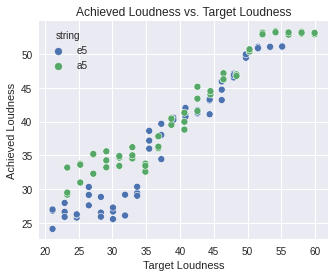

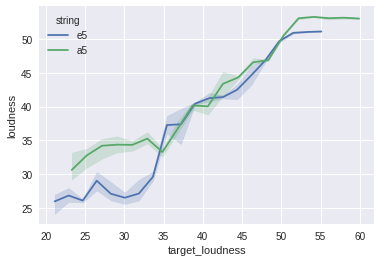

In [75]:
sns.scatterplot(data= Ds, x='target_loudness', y='loudness', hue='string')
plt.xlabel('Target Loudness')
plt.ylabel('Achieved Loudness')
plt.title('Achieved Loudness vs. Target Loudness')
# set equal aspect
plt.gca().set_aspect('equal', adjustable='box')
plt.figure()
sns.lineplot(data= Ds, x='target_loudness', y='loudness', hue='string')